In [1]:
# %cd /path/to/my/working/dir

In [2]:
import datetime
import pandas as pd
import db_client

In [3]:
client = db_client.get_db_client()
db = client.business
collection = db.rating_over_time

In [4]:
dataset = list(
    collection.aggregate([ 
         {
            "$match": {
                "timestamp": {"$gte": datetime.datetime.now() - datetime.timedelta(days=1600)}
            }
        },
        {
            "$project": {
                "date": {
                    "$dateToString": {"format": "%Y-%m", "date": "$timestamp"}
                },
                "cuisine": "$metadata.cuisine",
                "rating": "$rating",
            }
        },
        {
            "$group": {
                "_id": {
                    "cuisine": "$cuisine",
                    "date": "$date",
                },
                "average": {"$avg": "$rating"}
            }
        },
        {"$addFields": {"cuisine": "$_id.cuisine" }},
        {"$addFields": {"date": "$_id.date" }},
        {"$sort": {"date": 1 }}
    ])
)

In [5]:
df = pd.DataFrame(dataset)
df = df[["average", "cuisine", "date"]]
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.set_index("date", inplace=True)

In [7]:
df.head(n=10)

,average,cuisine
date,,
2018-03-01,2.892308,Tacos
2018-03-01,3.080645,Pasta
2018-03-01,3.071429,Pizza
2018-03-01,3.000000,Fast Food
2018-03-01,3.203390,Burgers
2018-03-01,3.500000,Sushi
2018-03-01,3.066667,Vegetarian
2018-03-01,1.423729,Bar Food
2018-03-01,3.000000,Steak


cuisine
Bar Food      AxesSubplot(0.125,0.125;0.775x0.755)
Burgers       AxesSubplot(0.125,0.125;0.775x0.755)
Fast Food     AxesSubplot(0.125,0.125;0.775x0.755)
Pasta         AxesSubplot(0.125,0.125;0.775x0.755)
Pizza         AxesSubplot(0.125,0.125;0.775x0.755)
Steak         AxesSubplot(0.125,0.125;0.775x0.755)
Sushi         AxesSubplot(0.125,0.125;0.775x0.755)
Tacos         AxesSubplot(0.125,0.125;0.775x0.755)
Vegetarian    AxesSubplot(0.125,0.125;0.775x0.755)
Name: average, dtype: object

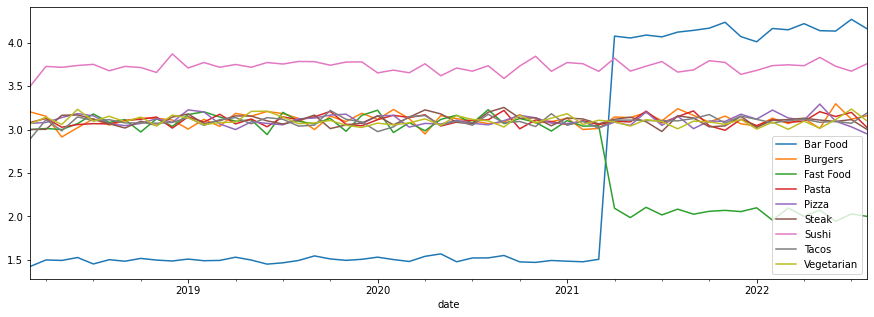

In [9]:
df.groupby("cuisine")['average'].plot(legend=True, figsize=(15, 5)) #matplotlib

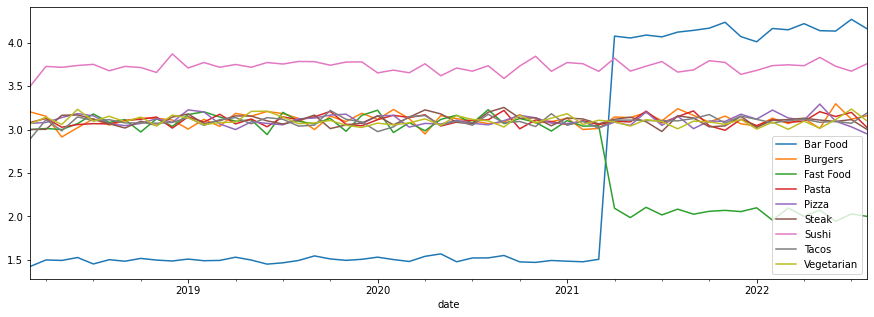

In [16]:
group_data = df.groupby("cuisine")['average']

group_plot = group_data.plot(legend=True, figsize=(15, 5)) #matplotlib

In [19]:
len(group_data)

9

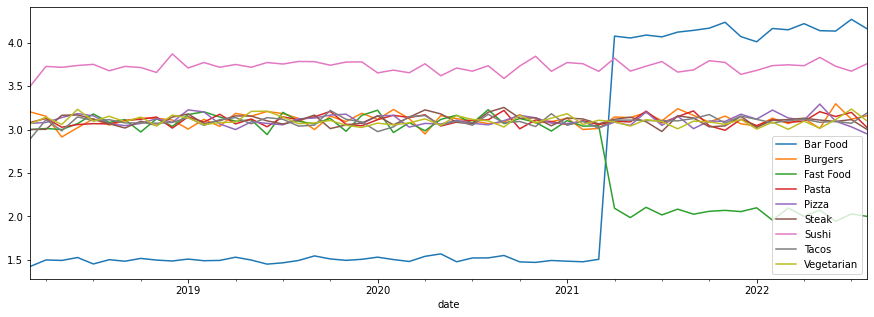

In [22]:
fig = group_plot[0].get_figure()
fig

In [23]:
fig.savefig("chart.png")